Reference (All code are refer to the website/article/ Library official documentation stated below)
*****************************************************************************
*    Title: Quick Hacks To Save Machine Learning Model using Pickle and Joblib
*    Author: Purnendu Shukla
*    Date: 2021
*    Availability: 
     https://www.analyticsvidhya.com/blog/2021/08/quick-hacks-to-save-machine-learning-model-using-pickle-and-joblib/
*****************************************************************************
*    Title: Imbalanced-Learn
*    Availability: https://pypi.org/project/imbalanced-learn/
*****************************************************************************
*    Title: scikit-learn Machine Learning in python
*    Availability:https://scikit-learn.org/stable/index.html
*****************************************************************************
*    Title: How To Restore Your Jupyter Notebook Session
*    Availability:https://towardsdatascience.com/how-to-restore-your-jupyter-notebook-session-dfeadbd86d65
****************************************************************************

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Load all libraries
import io
import os
import joblib
import numpy as np
import dask.bag as bag
import dask.diagnostics as diagnostics
import pandas as pd
from PIL import Image
from numpy import mean
from numpy import where   
from skimage.io import imread
from skimage.transform import resize
from collections import Counter
from matplotlib import pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset from Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Set data_path variable
# data_path = fr'/content/drive/MyDrive/Colab_Notebooks/weather-data'
# os.listdir(data_path)

In [4]:
# Ploting Images Pixel
# '''Returns dimenstions for an RBG image'''
# def get_dims(file):
#     im = Image.open(file)
#     arr = np.array(im)
#     h,w,d = arr.shape
#     return h,w

# directories = {'shine': '/content/drive/MyDrive/Colab_Notebooks/weather-data/shine/',
#                'not_shine': '/content/drive/MyDrive/Colab_Notebooks/weather-data/not_shine/'}

# for n,d in directories.items():
#     filepath = d
#     filelist = [filepath + f for f in os.listdir(filepath)]
#     dims = bag.from_sequence(filelist).map(get_dims)

#     with diagnostics.ProgressBar():
#         dims = dims.compute()
#         dim_df = pd.DataFrame(dims, columns=['height', 'width'])
#         sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
#         sizes.plot.scatter(x='width', y='height');
#         plt.title('Image Sizes (pixels) | {}'.format(n))

In [5]:
# Resize All Images to 100x100px and Save it to a pkl file Function

# PKL file is pickled to save space when being stored or transferred over a network 
# then is unpickled and loaded back into program memory during runtime

# Basic Configuration for pklfile
# base_name = 'weather-data'
# width = 100
# include = {'shine', 'not_shine'}

# def resize_all(src, pklname, include, width=100, height=None):
    
#     height = height if height is not None else width
     
#     data = dict()
#     data['description'] = 'resized ({0}x{1}) weather images in rgb'.format(int(width), int(height))
#     data['label'] = []
#     data['filename'] = []
#     data['data'] = []   
     
#     pklname = f"{pklname}_{width}x{height}px.pkl"
 
#     # read all images in PATH, resize and write to DESTINATION_PATH
#     for subdir in os.listdir(src):
#         if subdir in include:
#             # print(subdir)
#             current_path = os.path.join(src, subdir)
 
#             for file in os.listdir(current_path):
#                 im = imread(os.path.join(current_path, file))
#                 im = resize(im, (width, height)) #[:,:,::-1]
#                 data['label'].append(subdir)
#                 data['filename'].append(file)
#                 data['data'].append(im)
 
#         joblib.dump(data, pklname)

In [6]:
# # Call resize_all function
# resize_all(src=data_path, pklname=base_name, width=width, include=include)

In [7]:
# Basic Configuration of pklfile
base_name = 'weather-data'
width = 100
include = {'shine', 'not_shine'}

# Load data from pkl file and save it to 'data' variable
data =  joblib.load(f'{base_name}_{width}x{width}px.pkl')

print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))

counter = Counter(data['label'])
print(counter)

number of samples:  2016
keys:  ['description', 'label', 'filename', 'data']
description:  resized (100x100) weather images in rgb
image shape:  (100, 100, 3)
labels: ['not_shine' 'shine']
Counter({'not_shine': 1516, 'shine': 500})


Counter({'not_shine': 1516, 'shine': 500})


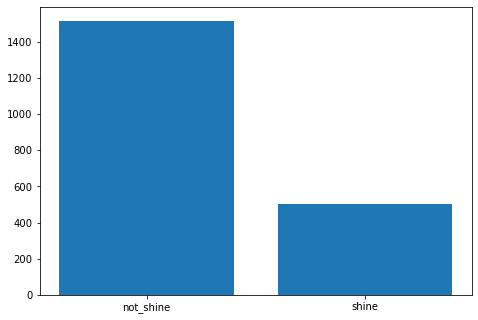

In [8]:
#Save shine images amount & not shine images amount to variable for future use
shine_amount = counter['shine']
not_shine_amount = counter['not_shine']

# Plot a bar chart to check whether data is balance or not
print(counter)
labels = np.unique(data['label'])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = labels
weathers = [not_shine_amount,shine_amount]
ax.bar(langs,weathers)
plt.show()

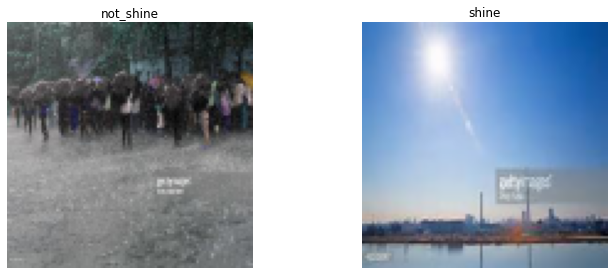

In [9]:
# Use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])

# Set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(10,4)
fig.tight_layout()

# Make a plot for every label (equipment) type.
# The index method returns the index of the first item 
# corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [10]:
# Load data & label to X,y
X = np.array(data['data']) # For Data(Images)
y = np.array(data['label']) # Label(Shine, Not Shine)

In [11]:
# Reshape X so that it can fit the dimension and used for Oversampling.
print('Before Reshape:', X.shape)

X = X.reshape(len(data['data']), 100 * 100 * 3)
print('After Reshape:', X.shape)

Before Reshape: (2016, 100, 100, 3)
After Reshape: (2016, 30000)


In [12]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.2)

print('Train Set: ', Counter(y_train))
print('Test Set: ', Counter(y_test))

Train Set:  Counter({'not_shine': 1215, 'shine': 397})
Test Set:  Counter({'not_shine': 301, 'shine': 103})


In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=40)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)

print('Resampled Set: ', Counter(y_ROS))
print('Test Set: ', Counter(y_test))

Resampled Set:  Counter({'not_shine': 1215, 'shine': 1215})
Test Set:  Counter({'not_shine': 301, 'shine': 103})


In [14]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import hinge_loss
from sklearn.preprocessing import StandardScaler

acc_train = [] 
acc_test = []
mean_val = []
hinge_train = []
hinge_test = []

kf = KFold(n_splits = 10, random_state = 40, shuffle = True)

for i in range(30, 351, 10):
    print('\nTraining model with iterations: ', i)

    svc = SVC(max_iter = i, random_state=40)
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', svc)])
    gridcv = GridSearchCV(pipe, param_grid={'verbose':[3]}, cv=kf, n_jobs = -1, scoring='accuracy', error_score='raise', return_train_score=True)

    clf = gridcv.fit(X_ROS, y_ROS)
    
    y_pred_train = clf.predict(X_ROS)
    train_score = accuracy_score(y_ROS, y_pred_train)
    print('Train Score', train_score * 100)
    
    y_pred_test = clf.predict(X_test)
    test_score = accuracy_score(y_test, y_pred_test)
    print('Test Score', test_score * 100)

    cv_score = cross_val_score(pipe, X_ROS, y_ROS, scoring = 'accuracy', cv=kf, n_jobs = -1)
    print('Validation Score:', mean(cv_score) * 100)

    pred_decision_train = clf.decision_function(X_ROS) 
    train_loss = hinge_loss(y_ROS, pred_decision_train)
    print('Hinge Loss (Train)', train_loss)

    pred_decision_test = clf.decision_function(X_test)
    test_loss = hinge_loss(y_test, pred_decision_test)
    print('Hinge Loss (Test)', test_loss)

    # Append the current accuracy score to the template list
    acc_train.append(train_score * 100)
    mean_val.append(mean(cv_score) * 100)
    acc_test.append(test_score * 100)
    hinge_train.append(train_loss)
    hinge_test.append(test_loss)

# Convert the accuracy list to a series
acc_train = pd.Series(acc_train, index = range(30, 351, 10))
acc_test = pd.Series(acc_test, index = range(30, 351, 10))
mean_val = pd.Series(mean_val, index = range(30, 351, 10))
hinge_train = pd.Series(hinge_train, index = range(30, 351, 10))
hinge_test = pd.Series(hinge_test, index = range(30, 351, 10))


Training model with iterations:  30
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   5.8s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   5.5s
Train Score 81.89300411522635
Test Score 78.21782178217822
Validation Score: 75.47325102880659
Hinge Loss (Train) 0.876411024385494
Hinge Loss (Test) 0.9075472941352968

Training model with iterations:  40
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   8.2s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   6.5s
Train Score 75.39094650205762
Test Score 69.05940594059405
Validation Score: 79.87654320987654
Hinge Loss (Train) 0.9134491109337346
Hinge Loss (Test) 0.9383269059913365

Training model with iterations:  50
[Pipeline] ............ (step 1 of 2) Processing scaler, total= 1.1min
[Pipeline] ............... (step 2 of 2) Processing svc, total=   7.5s
Train Score 86.74897119341564
Test Score 83.9108910891089
Validation Score: 82.42798353909467
Hinge Loss (Train) 0.793064371

Train Score 98.72427983539094
Test Score 94.80198019801979
Validation Score: 96.79012345679013
Hinge Loss (Train) 0.13946030565936085
Hinge Loss (Test) 0.2720787619663879

Training model with iterations:  270
[Pipeline] ............ (step 1 of 2) Processing scaler, total=  18.2s
[Pipeline] ............... (step 2 of 2) Processing svc, total=  26.6s
Train Score 99.1358024691358
Test Score 95.04950495049505
Validation Score: 96.87242798353908
Hinge Loss (Train) 0.13656032544933652
Hinge Loss (Test) 0.27741543265992114

Training model with iterations:  280
[Pipeline] ............ (step 1 of 2) Processing scaler, total=  19.1s
[Pipeline] ............... (step 2 of 2) Processing svc, total=  27.5s
Train Score 99.01234567901234
Test Score 94.3069306930693
Validation Score: 96.70781893004114
Hinge Loss (Train) 0.12356506991547725
Hinge Loss (Test) 0.26945681509735525

Training model with iterations:  290
[Pipeline] ............ (step 1 of 2) Processing scaler, total= 1.9min
[Pipeline] .......

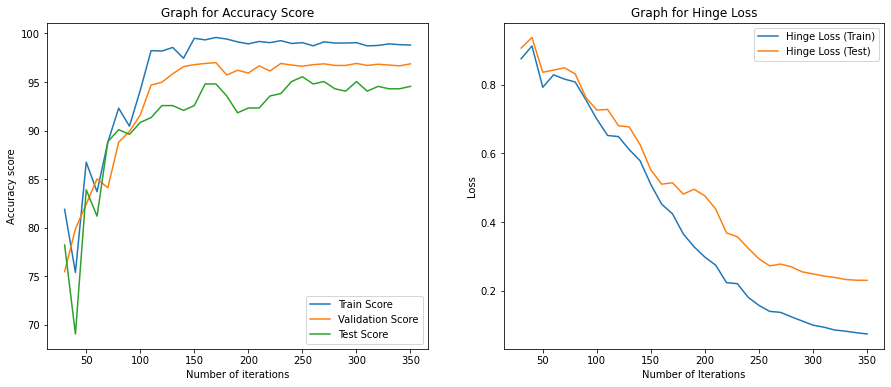

In [15]:
# Set the plot size
plt.figure(figsize = (15,6))

plt.subplot(121)
# Set the plot title
title = 'Graph for Accuracy Score'
plt.title(title)
# Set the xlabel and ylabel
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy score')
# Plot the graph
acc_train.plot(label = "Train Score")
mean_val.plot(label = "Validation Score")
acc_test.plot(label = "Test Score")
plt.legend()

plt.subplot(122)
title = 'Graph for Hinge Loss'
plt.title(title)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
hinge_train.plot(label = 'Hinge Loss (Train)')
hinge_test.plot(label = 'Hinge Loss (Test)')
plt.legend()

plt.show()

In [16]:
# Best Fit

kf = KFold(n_splits = 10, random_state = 40, shuffle = True)
svc_bestmodal = SVC(max_iter = 240, random_state = 40)
pipe_bestmodal = Pipeline([('scaler', StandardScaler()), ('svc', svc_bestmodal)])
gridcv_bestmodal = GridSearchCV(pipe_bestmodal, param_grid={'verbose':[3]}, cv=kf, n_jobs = -1, scoring='accuracy', error_score='raise', return_train_score=True)
best_model = gridcv_bestmodal.fit(X_ROS, y_ROS)

[Pipeline] ............ (step 1 of 2) Processing scaler, total= 1.9min
[Pipeline] ............... (step 2 of 2) Processing svc, total=  25.0s


In [17]:
from sklearn.metrics import accuracy_score

cv_score = cross_val_score(pipe_bestmodal, X_ROS, y_ROS, scoring = 'accuracy', cv=kf, n_jobs = -1)

print('Train Score     :', accuracy_score(y_ROS, best_model.predict(X_ROS)) * 100)
print('Validation Score: ', mean(cv_score) * 100)
print('Test Score      : ', accuracy_score(y_test, best_model.predict(X_test)) * 100)

Train Score     : 98.97119341563786
Validation Score:  96.74897119341563
Test Score      :  95.04950495049505


In [18]:
from sklearn.metrics import hinge_loss

pred_decision_train = best_model.decision_function(X_ROS)
print('Hinge Loss (Train):', hinge_loss(y_ROS, pred_decision_train))

pred_decision_test = best_model.decision_function(X_test)
print('Hinge Loss (Test) :', hinge_loss(y_test, pred_decision_test))

Hinge Loss (Train): 0.1805851651083704
Hinge Loss (Test) : 0.3238036751946569


In [19]:
from sklearn.metrics import classification_report
y_pred_train = best_model.predict(X_ROS)
y_pred_test = best_model.predict(X_test)

print('          TRAIN CLASSIFICATION REPORT')
print(classification_report(y_ROS, y_pred_train))

print('          TEST CLASSIFICATION REPORT')
print(classification_report(y_test, y_pred_test))

          TRAIN CLASSIFICATION REPORT
              precision    recall  f1-score   support

   not_shine       0.99      0.99      0.99      1215
       shine       0.99      0.99      0.99      1215

    accuracy                           0.99      2430
   macro avg       0.99      0.99      0.99      2430
weighted avg       0.99      0.99      0.99      2430

          TEST CLASSIFICATION REPORT
              precision    recall  f1-score   support

   not_shine       0.98      0.95      0.97       301
       shine       0.87      0.94      0.91       103

    accuracy                           0.95       404
   macro avg       0.93      0.95      0.94       404
weighted avg       0.95      0.95      0.95       404



          Confusion Matrix for Training Set


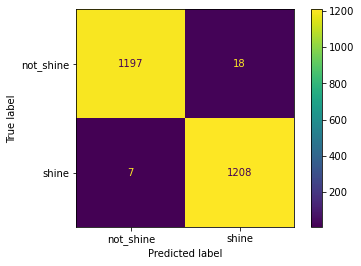

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print('          Confusion Matrix for Training Set')
y_pred_train = best_model.predict(X_ROS)
cm_train = confusion_matrix(y_ROS, y_pred_train, labels=best_model.classes_)
cm_display1 = ConfusionMatrixDisplay(cm_train, display_labels=best_model.classes_).plot()

          Confusion Matrix for Test Set


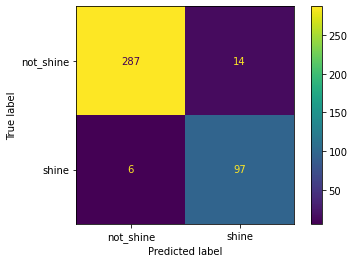

In [21]:
print('          Confusion Matrix for Test Set')
y_pred_test = best_model.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test, labels=best_model.classes_)
cm_display2 = ConfusionMatrixDisplay(cm_test, display_labels=best_model.classes_).plot()

In [2]:
from sklearn.model_selection import permutation_test_score

kf = KFold(n_splits = 10, random_state = 40, shuffle = True)
svc = SVC(random_state=40)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', svc)])

score, perm_scores, pvalue = permutation_test_score(
    pipe, X_ROS, y_ROS, scoring="accuracy", cv=kf, n_permutations=100, n_jobs = -1,verbose = 2, random_state = 40
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 88.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 460.6min finished


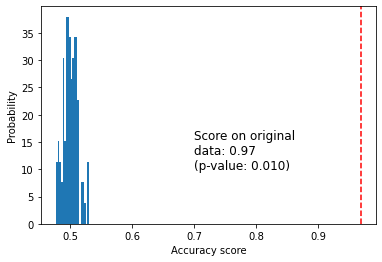

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores, bins=20, density=True)
ax.axvline(score, ls="--", color="r")
score_label = f"Score on original\ndata: {score:.2f}\n(p-value: {pvalue:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

In [1]:
import dill
# dill.dump_session('ros.db')
dill.load_session('ros.db')

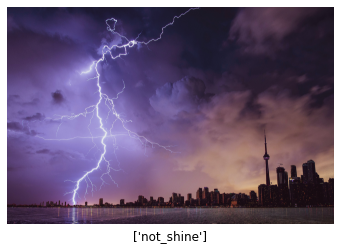

In [23]:
not_shine1 = plt.imread(r"C:\Users\PC\Desktop\Manual_Img_Testing\not_shine1.jpg")
resized_img = resize(not_shine1, (100, 100))
reshaped_image = resized_img.reshape(1,-1)

plt.axis('off')
plt.title(best_model.predict(reshaped_image), y=-0.10)
plt.imshow(not_shine1)

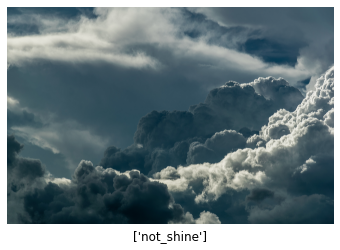

In [24]:
not_shine2 = plt.imread(r"C:\Users\PC\Desktop\Manual_Img_Testing\not_shine2.jpg")
resized_img = resize(not_shine2, (100, 100))
reshaped_image = resized_img.reshape(1,-1)

plt.axis('off')
plt.title(best_model.predict(reshaped_image), y=-0.10)
plt.imshow(not_shine2)

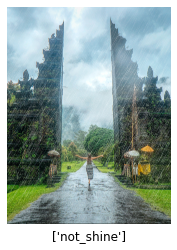

In [25]:
not_shine3 = plt.imread(r"C:\Users\PC\Desktop\Manual_Img_Testing\not_shine3.jpg")
resized_img = resize(not_shine3, (100, 100))
reshaped_image = resized_img.reshape(1,-1)

plt.axis('off')
plt.title(best_model.predict(reshaped_image), y=-0.10)
plt.imshow(not_shine3)

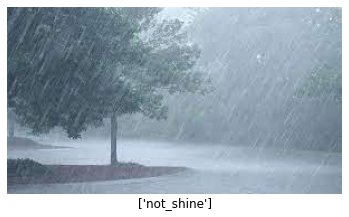

In [26]:
not_shine4 = plt.imread(r"C:\Users\PC\Desktop\Manual_Img_Testing\not_shine4.jpg")
resized_img = resize(not_shine4, (100, 100))
reshaped_image = resized_img.reshape(1,-1)

plt.axis('off')
plt.title(best_model.predict(reshaped_image), y=-0.10)
plt.imshow(not_shine4)

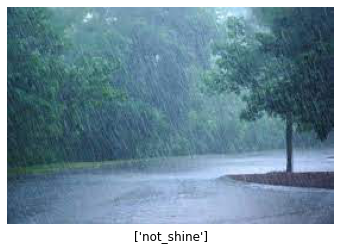

In [27]:
not_shine5 = plt.imread(r"C:\Users\PC\Desktop\Manual_Img_Testing\not_shine5.jpg")
resized_img = resize(not_shine5, (100, 100))
reshaped_image = resized_img.reshape(1,-1)

plt.axis('off')
plt.title(best_model.predict(reshaped_image), y=-0.10)
plt.imshow(not_shine5)

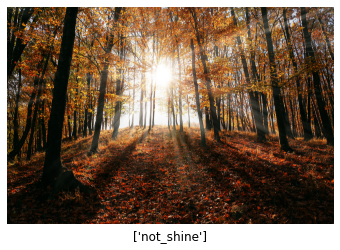

In [28]:
shine1 = plt.imread(r"C:\Users\PC\Desktop\Manual_Img_Testing\shine1.jpg")
resized_img = resize(shine1, (100, 100))
reshaped_image = resized_img.reshape(1,-1)

plt.axis('off')
plt.title(best_model.predict(reshaped_image), y=-0.10)
plt.imshow(shine1)

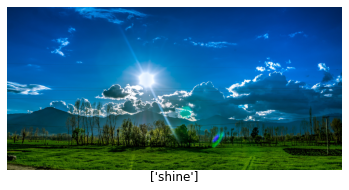

In [29]:
shine2 = plt.imread(r"C:\Users\PC\Desktop\Manual_Img_Testing\shine2.jpg")
resized_img = resize(shine2, (100, 100))
reshaped_image = resized_img.reshape(1,-1)

plt.axis('off')
plt.title(best_model.predict(reshaped_image), y=-0.10)
plt.imshow(shine2)

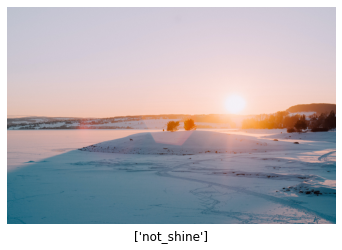

In [30]:
shine3 = plt.imread(r"C:\Users\PC\Desktop\Manual_Img_Testing\shine3.jpg")
resized_img = resize(shine3, (100, 100))
reshaped_image = resized_img.reshape(1,-1)

plt.axis('off')
plt.title(best_model.predict(reshaped_image), y=-0.10)
plt.imshow(shine3)

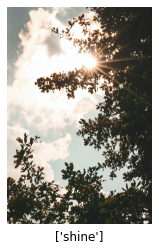

In [31]:
shine4 = plt.imread(r"C:\Users\PC\Desktop\Manual_Img_Testing\shine4.jpg")
resized_img = resize(shine4, (100, 100))
reshaped_image = resized_img.reshape(1,-1)

plt.axis('off')
plt.title(best_model.predict(reshaped_image), y=-0.10)
plt.imshow(shine4)

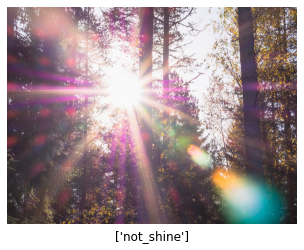

In [32]:
shine5 = plt.imread(r"C:\Users\PC\Desktop\Manual_Img_Testing\shine5.jpg")
resized_img = resize(shine5, (100, 100))
reshaped_image = resized_img.reshape(1,-1)

plt.axis('off')
plt.title(best_model.predict(reshaped_image), y=-0.10)
plt.imshow(shine5)